# Analiza knjig

V tej projektni nalogi bom analizirala, trenutno najpopularnejše knjige. Podatke sem pridobila na internetni strani https://openlibrary.org/trending/daily?page=1

In [85]:
import pandas as pd
pd.set_option('display.max_rows', 10)
%matplotlib inline
import math

In [86]:
knjige = pd.read_csv('knjige.csv', index_col='Naslov', sep=';')

In [87]:
knjige

,Avtor,Ocena,Stevilo strani,Leto,Opis
Naslov,,,,,
Um casamento arranjado,by Zana Kheiron,"4,14",160,2019,Uma historia de uma familia falida q faz acord...
The 48 laws of power,"by Robert Greene, Joost Elffers, William Richm...","4,21",not given,1998,"Amoral, cunning, ruthless, and instructive, th..."
Atomic Habits,by James Clear and Àlex Guàrdia Berdiell,"4,25",320,2018,"No matter your goals, Atomic Habits offers a p..."
"Rich dad, poor dad","by Robert T. Kiyosaki, Sharon L. Lechter, and ...","4,1",207,1998,Argues that a good education and a secure job ...
It Ends With Us,by Colleen Hoover,"4,29",384,2016,"Lily hasn’t always had it easy, but that’s nev..."
...,...,...,...,...,...
Persuasion,by Jane Austen,"4,18",328,1892,Persuasion tells the love story of Anne Elliot...
Dante,by Sadie Kincaid,5,348,2023,This edition doesn't have a description yet. C...
City of style,by Melissa Magsaysay,not given,178,2012,This edition doesn't have a description yet. C...


Najprej pogledamo katere knjige so najboljše in najslabše ocenjene.

In [108]:
knjige_odstrani = knjige[knjige['Ocena'] != 'not given']
ocenjene_knjige = knjige_odstrani.sort_values('Ocena', ascending=False)

ocenjene_knjige

,Avtor,Ocena,Stevilo strani,Leto,Opis
Naslov,,,,,
Mastery,by Robert Greene,5.00,336.0,2012,"Robert Greene, the ""modern Machiavelli"" debunk..."
Dante,by Sadie Kincaid,5.00,348.0,2023,This edition doesn't have a description yet. C...
Jack and the beanstalk,by Ann Keay Beneduce,5.00,32.0,1999,"A boy climbs to the top of a giant beanstalk, ..."
Managing Oneself,by Peter F. Drucker,5.00,128.0,2017,This edition doesn't have a description yet. C...
Monday's not coming,by Tiffany D. Jackson,4.75,435.0,2018,When her friend Monday Charles goes missing an...
...,...,...,...,...,...
The Alchemist,by Paulo Coelho,3.66,167.0,1993,Read This Book For Free Now👉 https://t.co/NYg8...
Haunting Adeline,by H. D. Carlton,3.66,592.0,2023,The Manipulator
Angels & Demons,by Dan Brown,3.58,620.0,2001,"""When a world renowned scientist is found brut..."


In [109]:
ocenjene_knjige['Ocena']

Naslov
Mastery                                       5.00
Dante                                         5.00
Jack and the beanstalk                        5.00
Managing Oneself                              5.00
Monday's not coming                           4.75
                                              ... 
The Alchemist                                 3.66
Haunting Adeline                              3.66
Angels & Demons                               3.58
Control Your Mind and Master Your Feelings    3.52
Céntrate                                      1.00
Name: Ocena, Length: 115, dtype: float64

Potem pogledamo katere knjige so najdalše in katere najkrajše.

In [110]:
knjige_odstrani = knjige[knjige['Stevilo strani'] != 'not given']
strani_knjige = knjige_odstrani.sort_values('Stevilo strani', ascending=False)

strani_knjige['Stevilo strani']

Naslov
It                                1138.0
Harry Potter és a Főnix Rendje     751.0
The cruel prince                   750.0
Steve Jobs                         693.0
Steve Jobs                         693.0
                                   ...  
Corduroy                            32.0
Jack and the beanstalk              32.0
Guess how much I love you           30.0
Guess how much I love you           30.0
The Richest Man in Babylon           1.0
Name: Stevilo strani, Length: 115, dtype: float64

Zanima nas ali število strani v knjigi, vpliva na njeno oceno.

In [90]:
knjige['Ocena'] = knjige['Ocena'].astype(str)

knjige['Ocena'] = knjige['Ocena'].str.replace(',', '.').astype(float)

knjige['Stevilo strani'] = pd.to_numeric(knjige['Stevilo strani'], errors='coerce')
knjige.dropna(subset=['Stevilo strani'], inplace=True)

<Axes: xlabel='Stevilo strani', ylabel='Ocena'>

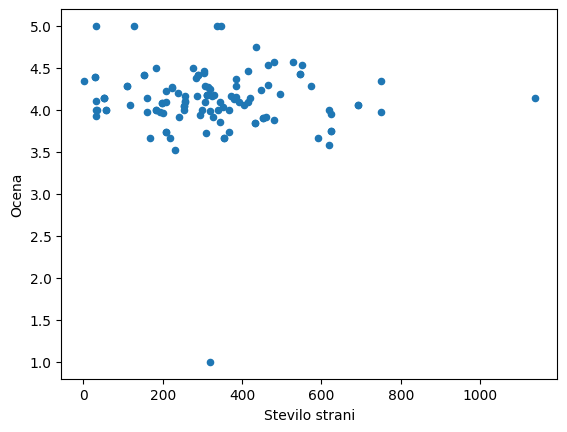

In [91]:
knjige.plot.scatter(x='Stevilo strani', y='Ocena')

Očitno število strani v knjigi ne vpliva na njeno ocneo.

Sedaj pa nas zanima povprečna dolžina knjig čez leta

<Axes: xlabel='Leto', ylabel='povprečna dolžina knjige'>

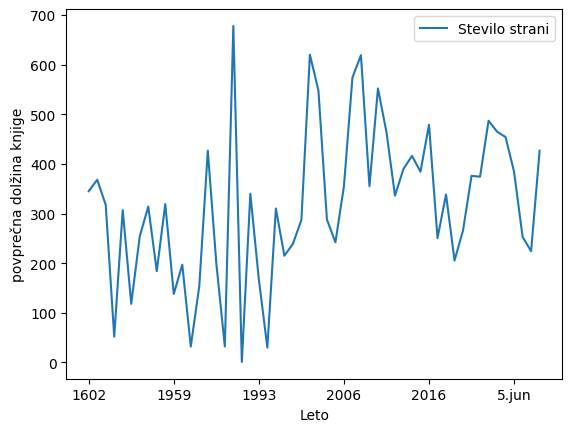

In [96]:
knjige[['Leto', 'Stevilo strani']].groupby(by='Leto').mean().plot(ylabel="povprečna dolžina knjige")

Opazimo da se je čez leta povprečna dolžina knjig povečala.

Radi bi izvedli kakšna je povprečna ocena knjig, izdanih pred letom 2000.

In [100]:
knjige['Leto'] = pd.to_numeric(knjige['Leto'], errors='coerce').astype('Int64')
knjige_pred_2000 = knjige[knjige['Leto'] < 2000]
average_ocena_pred_2000 = knjige_pred_2000['Ocena'].mean()
average_ocena_pred_2000

4.0823809523809516

Ter še povprečna ocena po letu 2000

In [101]:
knjige_po_2000 = knjige[knjige['Leto'] > 2000]
average_ocena_po_2000 = knjige_po_2000['Ocena'].mean()
average_ocena_po_2000

4.135873015873015

Povprečna ocena knjig se je po letu 2000 malček povečala.

Zanima nas kakšna je korelacija med oceno, dolžino knjige in letom izdaje.

In [102]:
knjige[['Ocena', 'Stevilo strani', 'Leto']].corr()

,Ocena,Stevilo strani,Leto
Ocena,1.000000,-0.058595,0.040653
Stevilo strani,-0.058595,1.000000,0.161877
Leto,0.040653,0.161877,1.000000


Na podlagi vaših rezultatov lahko ugotovimo:

Med oceno in številom strani obstaja zelo šibka negativna korelacija (-0.058595), kar pomeni, da večje število strani ni nujno povezano z nižjo oceno, in obratno.

Med oceno in letom izdaje obstaja zelo šibka pozitivna korelacija (0.040653). To pomeni, da obstaja rahla tendenca, da so novejše knjige nekoliko bolje ocenjene, vendar je ta povezava zelo šibka.

Med številom strani in letom izdaje obstaja šibka pozitivna korelacija (0.161877), kar pomeni, da so novejše knjige morda nekoliko daljše, vendar spet gre za precej šibko povezavo.

Na podlagi teh rezultatov lahko sklepamo, da nobena od spremenljivk (ocena, število strani, leto izdaje) nima izrazitega vpliva na drugo spremenljivko.